In [34]:
import requests
import pandas as pd

In [35]:
# Récupérer notre clef API
with open("api_key.txt", "r") as f:
    api_key = f.read()

In [36]:
def call_weather_api(city_name:str, api_key:str=api_key) -> requests.Response:
    # Construction de la requête.
    api_request = f"https://api.openweathermap.org/data/2.5/weather?q={city_name.lower()}&appid={api_key}&lang=fr&units=metric"

    result = requests.get(api_request)

    if result.status_code == 200:
        return result
    else:
        print(f"ERROR: status code {result.status_code}")
        return None

In [37]:
# On crée un dictionnaire qui nous permettra de faire une dataframe plus tard.
weather_results = {
    "city": ["Rouen", "Caen", "Tour", "Marseille", "Paris"],
    "weather": [],
    "temperature": []
}

In [38]:
# On récupère les résultats météo pour chaque ville dans notre dictionnaire.
for city_name in weather_results["city"]:
    result = call_weather_api(city_name)
    result = result.json()

    # On concatène le résultat météo car c'est une liste de dictionnaires.
    if result["weather"]:
        weather_results["weather"].append(";".join([elem["description"] for elem in result["weather"]]))
    else:
        weather_results["weather"].append(None)
    # On récupère la température pour cette ville.
    if result["main"]["temp"]:
        weather_results["temperature"].append(result["main"]["temp"])
    else:
        weather_results["temperature"].append(None)

In [40]:
weather_results

{'city': ['Rouen', 'Caen', 'Tour', 'Marseille', 'Paris'],
 'weather': ['bruine légère;brume',
  'couvert',
  'ciel dégagé',
  'couvert',
  'couvert'],
 'temperature': [13.94, 15.12, 19.4, 21.83, 14.38]}

In [41]:
df = pd.DataFrame(weather_results)
df

,city,weather,temperature
0,Rouen,bruine légère;brume,13.94
1,Caen,couvert,15.12
2,Tour,ciel dégagé,19.40
3,Marseille,couvert,21.83
4,Paris,couvert,14.38


In [48]:
# On vérifie si on a des valeurs nulles dans notre DF.
df.isna().sum()

city           0
weather        0
temperature    0
dtype: int64

<AxesSubplot:xlabel='city'>

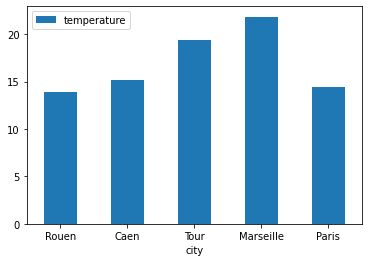

In [50]:
df.plot.bar(x="city", y="temperature", rot=0)